In [23]:
# Initial imports.
import pandas as pd
import numpy as np
from path import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import export_graphviz
import sqlite3

In [24]:
conn = sqlite3.connect('../HomelessData.db')
c = conn.cursor()

In [25]:
# Loading data
df_2017 = pd.read_sql("SELECT * FROM CocData WHERE year = 2017", con = conn)

df_2017.head()

,Coc,TotalBeds,Emergency,Transitional,SafeHaven,RapidRehousing,PermanentSupportive,PermanentOther,Year,CocYear,TotalHomeless,Unsheltered,Sheltered,Population,Unemployment
0,AK-500,1023,597,426,0,43,571,71,2017,AK-500 2017,1128,155,973,294338.0,5.400000
1,AK-501,805,533,272,0,23,368,30,2017,AK-501 2017,717,139,578,426994.0,8.166667
2,AL-500,986,595,357,34,525,1542,93,2017,AL-500 2017,1092,217,875,961158.0,3.933333
3,AL-501,526,304,222,0,54,247,0,2017,AL-501 2017,606,265,341,626566.0,4.800000
4,AL-502,237,41,196,0,0,36,20,2017,AL-502 2017,155,22,133,208593.0,4.900000


In [26]:
df_2017=df_2017.drop(['TotalHomeless', 'Sheltered', 'TotalBeds', 'CocYear', 'Coc', 'Year'], axis=1)

In [27]:
#df_2017['Unsheltered_div_pop'] = df_2017['Unsheltered'] / df_2017['Population']

In [28]:
#df_2017.head()

In [29]:
df_2017['Unsheltered_perc_pop'] = (df_2017['Unsheltered'] / df_2017['Population']) *100

In [30]:
df_2017.head()

,Emergency,Transitional,SafeHaven,RapidRehousing,PermanentSupportive,PermanentOther,Unsheltered,Population,Unemployment,Unsheltered_perc_pop
0,597,426,0,43,571,71,155,294338.0,5.400000,0.052661
1,533,272,0,23,368,30,139,426994.0,8.166667,0.032553
2,595,357,34,525,1542,93,217,961158.0,3.933333,0.022577
3,304,222,0,54,247,0,265,626566.0,4.800000,0.042294
4,41,196,0,0,36,20,22,208593.0,4.900000,0.010547


In [31]:
df_2017['ES_beds_perc_pop'] = (df_2017['Emergency'] / df_2017['Population']) *100

In [32]:
df_2017['TS_beds_perc_pop'] = (df_2017['Transitional'] / df_2017['Population']) *100

In [33]:
df_2017['SH_beds_perc_pop'] = (df_2017['SafeHaven'] / df_2017['Population']) *100

In [34]:
df_2017['RRH_units_perc_pop'] = (df_2017['RapidRehousing'] / df_2017['Population']) *100

In [35]:
df_2017['RRH_units_perc_pop'] = (df_2017['RapidRehousing'] / df_2017['Population']) *100

In [36]:
df_2017['PSH_units_perc_pop'] = (df_2017['PermanentSupportive'] / df_2017['Population']) *100

In [37]:
df_2017['OPH_units_perc_pop'] = (df_2017['PermanentOther'] / df_2017['Population']) *100

In [38]:
df_2017.head()

,Emergency,Transitional,SafeHaven,RapidRehousing,PermanentSupportive,PermanentOther,Unsheltered,Population,Unemployment,Unsheltered_perc_pop,ES_beds_perc_pop,TS_beds_perc_pop,SH_beds_perc_pop,RRH_units_perc_pop,PSH_units_perc_pop,OPH_units_perc_pop
0,597,426,0,43,571,71,155,294338.0,5.400000,0.052661,0.202828,0.144732,0.000000,0.014609,0.193995,0.024122
1,533,272,0,23,368,30,139,426994.0,8.166667,0.032553,0.124826,0.063701,0.000000,0.005386,0.086184,0.007026
2,595,357,34,525,1542,93,217,961158.0,3.933333,0.022577,0.061904,0.037143,0.003537,0.054622,0.160431,0.009676
3,304,222,0,54,247,0,265,626566.0,4.800000,0.042294,0.048518,0.035431,0.000000,0.008618,0.039421,0.000000
4,41,196,0,0,36,20,22,208593.0,4.900000,0.010547,0.019656,0.093963,0.000000,0.000000,0.017258,0.009588


In [39]:
df_2017=df_2017.drop(['Emergency', 'Transitional', 'SafeHaven', 'RapidRehousing', 'PermanentSupportive', 'PermanentOther', 'Unsheltered'], axis=1)

In [40]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            371 non-null    float64
 1   Unemployment          371 non-null    float64
 2   Unsheltered_perc_pop  371 non-null    float64
 3   ES_beds_perc_pop      371 non-null    float64
 4   TS_beds_perc_pop      371 non-null    float64
 5   SH_beds_perc_pop      371 non-null    float64
 6   RRH_units_perc_pop    371 non-null    float64
 7   PSH_units_perc_pop    371 non-null    float64
 8   OPH_units_perc_pop    371 non-null    float64
dtypes: float64(9)
memory usage: 26.2 KB


In [41]:
df_2017.head()

,Population,Unemployment,Unsheltered_perc_pop,ES_beds_perc_pop,TS_beds_perc_pop,SH_beds_perc_pop,RRH_units_perc_pop,PSH_units_perc_pop,OPH_units_perc_pop
0,294338.0,5.400000,0.052661,0.202828,0.144732,0.000000,0.014609,0.193995,0.024122
1,426994.0,8.166667,0.032553,0.124826,0.063701,0.000000,0.005386,0.086184,0.007026
2,961158.0,3.933333,0.022577,0.061904,0.037143,0.003537,0.054622,0.160431,0.009676
3,626566.0,4.800000,0.042294,0.048518,0.035431,0.000000,0.008618,0.039421,0.000000
4,208593.0,4.900000,0.010547,0.019656,0.093963,0.000000,0.000000,0.017258,0.009588


In [42]:
# Define the features set.
X = df_2017.copy()
X = X.drop("Unsheltered_perc_pop", axis=1)
X.head()

,Population,Unemployment,ES_beds_perc_pop,TS_beds_perc_pop,SH_beds_perc_pop,RRH_units_perc_pop,PSH_units_perc_pop,OPH_units_perc_pop
0,294338.0,5.400000,0.202828,0.144732,0.000000,0.014609,0.193995,0.024122
1,426994.0,8.166667,0.124826,0.063701,0.000000,0.005386,0.086184,0.007026
2,961158.0,3.933333,0.061904,0.037143,0.003537,0.054622,0.160431,0.009676
3,626566.0,4.800000,0.048518,0.035431,0.000000,0.008618,0.039421,0.000000
4,208593.0,4.900000,0.019656,0.093963,0.000000,0.000000,0.017258,0.009588


In [43]:
# Define the target set.
y = df_2017["Unsheltered_perc_pop"].ravel()
y[:5]

array([0.05266055, 0.03255315, 0.02257693, 0.04229403, 0.01054685])

In [44]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [45]:
regr = RandomForestRegressor(max_depth=3, random_state=0)

In [46]:
reg_model = regr.fit(X, y)

In [47]:
importances = reg_model.feature_importances_
importances

array([0.11728886, 0.15696249, 0.05191535, 0.34339795, 0.00092011,
       0.109242  , 0.21305324, 0.00722   ])

In [48]:
# We can sort the features by their importance.
sorted(zip(reg_model.feature_importances_, X.columns), reverse=True)

[(0.3433979476983135, 'TS_beds_perc_pop'),
 (0.2130532372779768, 'PSH_units_perc_pop'),
 (0.1569624941003427, 'Unemployment'),
 (0.11728885548402718, 'Population'),
 (0.10924200206945249, 'RRH_units_perc_pop'),
 (0.0519153523817578, 'ES_beds_perc_pop'),
 (0.007219998945765491, 'OPH_units_perc_pop'),
 (0.0009201120423640083, 'SH_beds_perc_pop')]

In [49]:
%matplotlib inline
from matplotlib import pyplot as plt

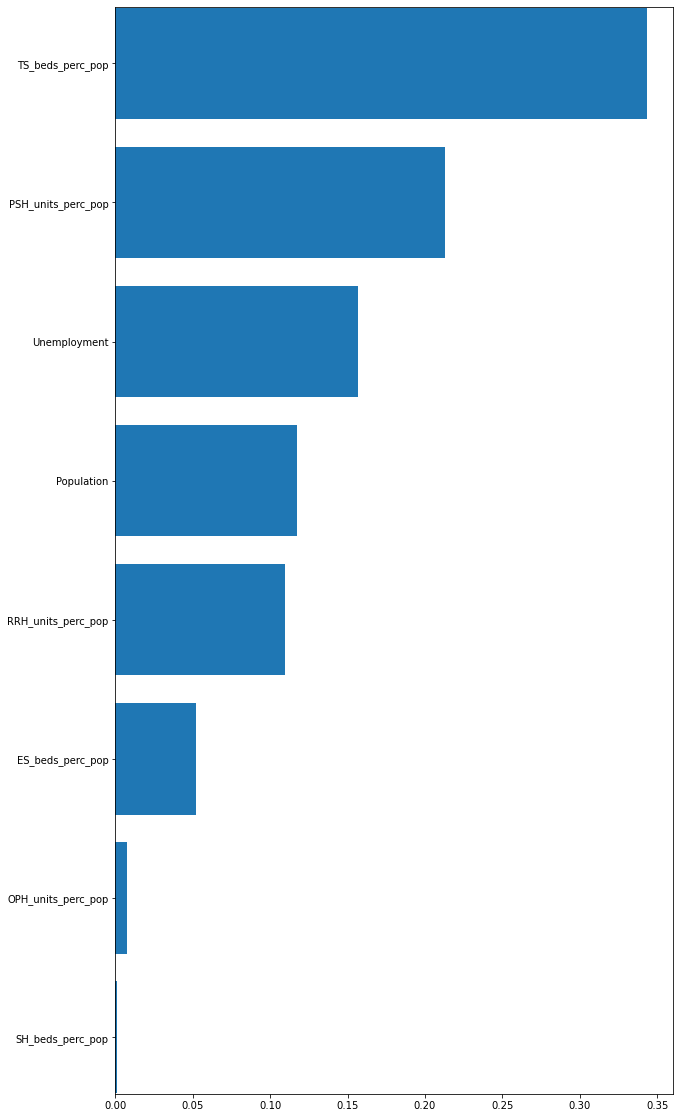

In [50]:
features = sorted(zip(X.columns, reg_model.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,20)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [51]:
estimator = reg_model.estimators_[5]

[Text(0.4583333333333333, 0.875, 'X[3] <= 0.146\nsquared_error = 0.008\nsamples = 234\nvalue = 0.055'),
 Text(0.25, 0.625, 'X[1] <= 14.725\nsquared_error = 0.006\nsamples = 226\nvalue = 0.049'),
 Text(0.16666666666666666, 0.375, 'X[3] <= 0.064\nsquared_error = 0.006\nsamples = 225\nvalue = 0.047'),
 Text(0.08333333333333333, 0.125, 'squared_error = 0.003\nsamples = 193\nvalue = 0.038'),
 Text(0.25, 0.125, 'squared_error = 0.019\nsamples = 32\nvalue = 0.102'),
 Text(0.3333333333333333, 0.375, 'squared_error = -0.0\nsamples = 1\nvalue = 0.565'),
 Text(0.6666666666666666, 0.625, 'X[6] <= 0.475\nsquared_error = 0.012\nsamples = 8\nvalue = 0.251'),
 Text(0.5, 0.375, 'X[5] <= 0.084\nsquared_error = 0.003\nsamples = 4\nvalue = 0.326'),
 Text(0.4166666666666667, 0.125, 'squared_error = 0.0\nsamples = 3\nvalue = 0.362'),
 Text(0.5833333333333334, 0.125, 'squared_error = -0.0\nsamples = 1\nvalue = 0.236'),
 Text(0.8333333333333334, 0.375, 'X[4] <= 0.002\nsquared_error = 0.0\nsamples = 4\nvalue =

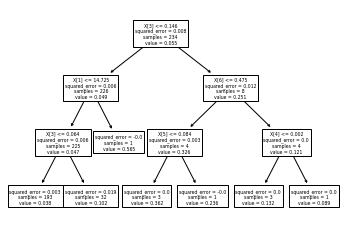

In [52]:
from sklearn import tree
tree.plot_tree(reg_model.estimators_[0])

In [53]:
df_2017.to_csv('2017_converted.csv', index=False)